এই কোডের উদ্দেশ্য:
✅ PPG (Photoplethysmogram) সিগন্যাল প্রসেসিং ও হার্ট রেট নির্ণয় 🚀

📌 প্রধান ধাপ:
1️⃣ একটি কৃত্রিম PPG সিগন্যাল তৈরি করা

সাইন ওয়েভ (Sin Signal) → হার্টবিট সিমুলেট করতে।
নয়েজ (Noise Signal) যোগ করা → বাস্তব ডেটার মতো করতে।
2️⃣ PPG সিগন্যাল ফিল্টারিং

Bandpass ফিল্টার (0.5Hz - 5Hz) প্রয়োগ করে অপ্রয়োজনীয় নয়েজ সরানো।
3️⃣ সিগন্যাল নরমালাইজেশন

0-1 স্কেলে নিয়ে আসা, যাতে সঠিক হার্টবিট পিক্স (Peaks) সনাক্ত করা যায়।
4️⃣ হার্টবিট ডিটেকশন ও হার্ট রেট গণনা

find_peaks() ফাংশন ব্যবহার করে হার্টবিটের শীর্ষ বিন্দু (Peaks) বের করা।
Inter-Beat Interval (IBI) গণনা → দুই পিকের মাঝে সময় পার্থক্য।
Heart Rate (BPM) নির্ণয় → 
Heart Rate
=
60
IBI
Heart Rate= 
IBI
60
​
 
5️⃣ সকল ধাপ ভিজুয়ালাইজেশন

মূল, নয়েজ, ফিল্টার করা ও হার্টবিট সহ 6টি গ্রাফ প্লট করা।
📌 সংক্ষেপে:
এই কোডটি PPG সিগন্যাল থেকে হার্টবিট সনাক্ত করে এবং হার্ট রেট (BPM) নির্ণয় করে। এটি বায়োমেডিক্যাল সিগন্যাল প্রসেসিং, স্বাস্থ্য পর্যবেক্ষণ এবং ওয়্যারেবল ডিভাইসে ব্যবহৃত হয়

Heart Rate:  71.90738769795313  BPM


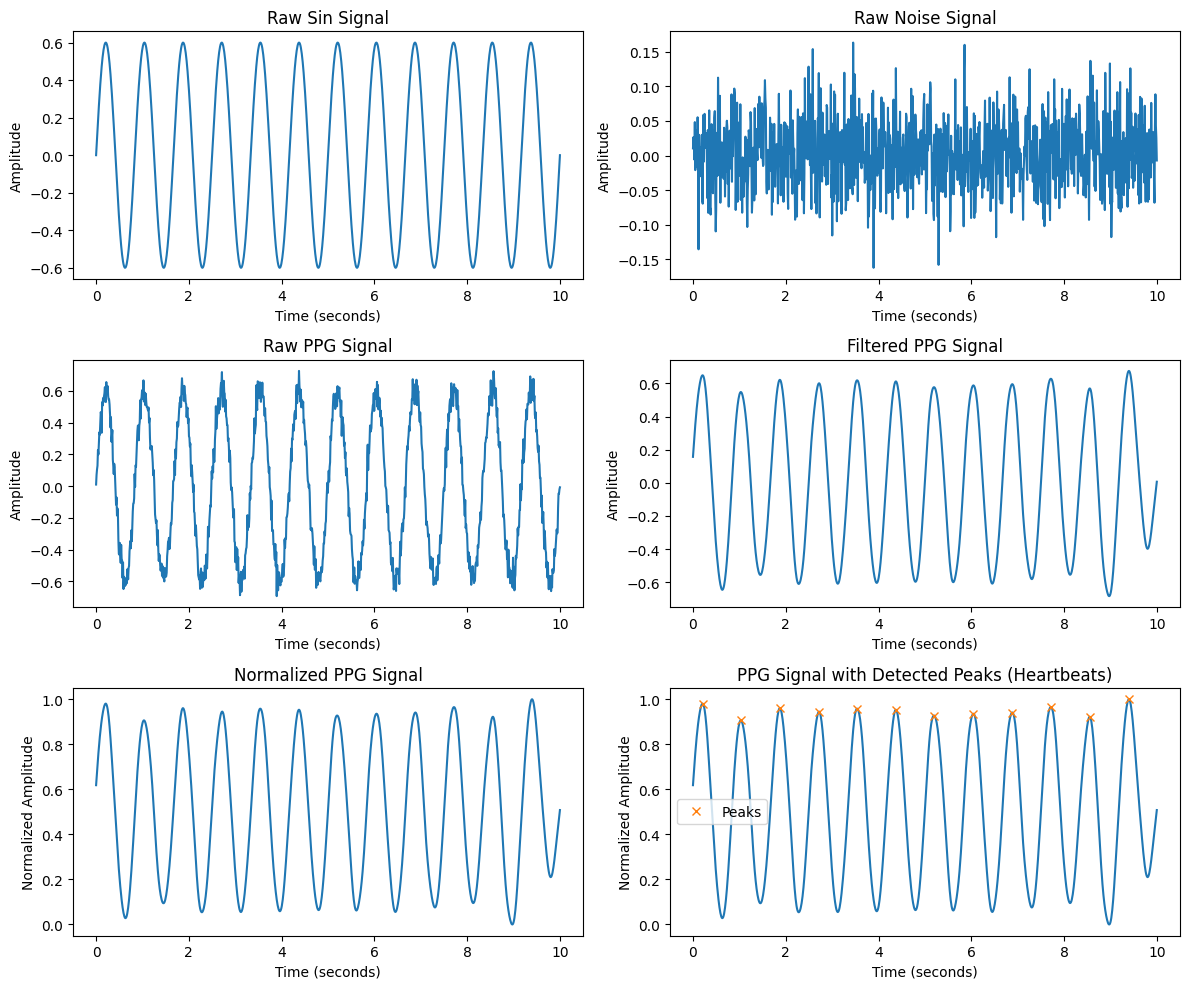

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# Signal parameters
fs = 100
t = np.linspace(0, 10, fs * 10)

# Generate signals
sin_signal = 0.6 * np.sin(2 * np.pi * 1.2 * t)



# Plotting
plt.figure(figsize=(12, 10))

# Subplot 1: Raw Sin Signal
plt.subplot(3, 2, 1)
plt.plot(t, sin_signal)
plt.title("Raw Sin Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

noise_signal = np.random.normal(0, 0.05, len(t))

# Subplot 2: Raw Noise Signal
plt.subplot(3, 2, 2)
plt.plot(t, noise_signal)
plt.title("Raw Noise Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

ppg_signal = sin_signal + noise_signal

# Subplot 3: Raw PPG Signal
plt.subplot(3, 2, 3)
plt.plot(t, ppg_signal)
plt.title("Raw PPG Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

# আপনার প্রদত্ত কোডটি একটি ব্যান্ডপাস ফিল্টার প্রয়োগ করে পিপিজি (PPG) সিগন্যালকে ফিল্টার করছে, যা নির্দিষ্ট ফ্রিকোয়েন্সি পরিসরে থাকা সিগন্যাল উপাদানগুলোকে সংরক্ষণ করে এবং অন্যান্য উপাদানগুলোকে সরিয়ে দেয়।

# Bandpass filter function
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist  # Nyquist ফ্রিকোয়েন্সি হলো সর্বোচ্চ ফ্রিকোয়েন্সি, যা কোনো ডিজিটাল সিস্টেমে নমুনা হার (sampling rate) দ্বারা সঠিকভাবে রিপ্রেজেন্ট করা সম্ভব।
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Filter and normalize PPG signal

filtered_ppg = bandpass_filter(ppg_signal, 0.5, 5, fs)

# Subplot 4: Filtered PPG Signal
plt.subplot(3, 2, 4)
plt.plot(t, filtered_ppg)
plt.title("Filtered PPG Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

normalized_ppg = (filtered_ppg - np.min(filtered_ppg)) / (np.max(filtered_ppg) - np.min(filtered_ppg))

# Subplot 5: Normalized PPG Signal
plt.subplot(3, 2, 5)
plt.plot(t, normalized_ppg)
plt.title("Normalized PPG Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Amplitude")

# Detect peaks in the PPG signal
peaks, _ = find_peaks(normalized_ppg, distance=fs * 0.6)
ibi = np.diff(peaks) / fs  # Inter-beat interval in seconds
heart_rate = 60 / ibi  # Heart rate in BPM

# Print Heart Rate
print("Heart Rate: ", np.mean(heart_rate), " BPM")

# Subplot 6: PPG Signal with Detected Peaks
plt.subplot(3, 2, 6)
plt.plot(t, normalized_ppg)
plt.plot(t[peaks], normalized_ppg[peaks], "x", label="Peaks")
plt.title("PPG Signal with Detected Peaks (Heartbeats)")
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Amplitude")
plt.legend()

plt.tight_layout()
plt.show()




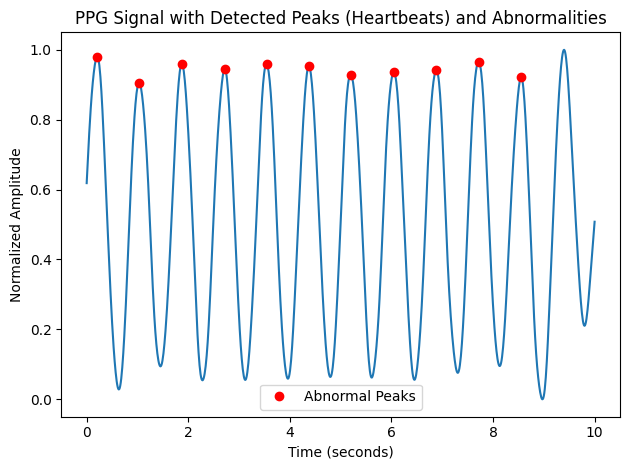

In [ ]:
# Calculate heart rate and standard deviation
mean_heart_rate = np.mean(heart_rate)
std_heart_rate = np.std(heart_rate)

# Define a threshold for abnormal heart rate
lower_threshold = 50  # Minimum heart rate (normal)
upper_threshold = 0  # Maximum heart rate (normal)


abnormal_peaks = []

# Loop through the heart rate array to find abnormal peaks
for i in range(len(heart_rate)):
    if heart_rate[i] < lower_threshold or heart_rate[i] > upper_threshold:
        abnormal_peaks.append(peaks[i])  # Mark the corresponding peaks as abnormal

# Plot PPG signal with abnormal peaks
plt.plot(t, normalized_ppg)
plt.plot(t[abnormal_peaks], normalized_ppg[abnormal_peaks], "ro", label="Abnormal Peaks")  # Abnormal peaks

plt.title("PPG Signal with Detected Peaks (Heartbeats) and Abnormalities")
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Amplitude")
plt.legend()

plt.tight_layout()
plt.show()
